## Métodos númericos

Conceptos semana 2:

- Integrales, metodos
- Errores

Ejemplo, cuarto de circulo:

$$ I = \int_0^1 \sqrt{1-x^2} dx = \frac{\pi}{4} $$

Esta función es decreciente, por lo que podemos calcular un cota superior e inferior. El número $\pi$ es irracional, por lo que no tiene representación en el computador, ya nuestro problema tiene un error de redondeo.

Existe otros errores de medición, el que corresponde a los errores en la captura de los datos, por último existe los errores de truncamiento, pensemos en la sumatoria que vimos la semana pasada.

In [1]:
# supongamos 10 intervalos e integracion de Riemann
import numpy as np

def funcion(x):
    return np.sqrt(1-x*x)

teorico = np.pi/4
print("Resultado teorico =", teorico) #ya hay un error de redondeo

Resultado teorico = 0.7853981633974483


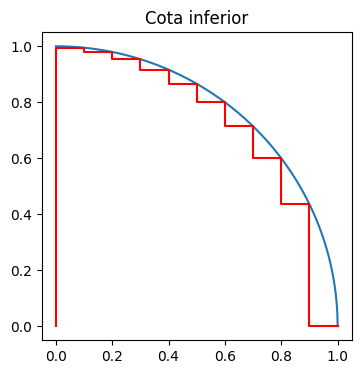

In [3]:
import matplotlib.pyplot as plt

# cota inferior de la integral
x = [n/1000 for n in range(1001)]
plt.figure(figsize=(4,4))
plt.plot(x, [funcion(i) for i in x])

N = 10
xinf = [0]
yinf = [0]
for i in range(N):
    xinf.append(i/N)
    xinf.append((i+1)/N)
    yinf.append(funcion(xinf[-1]))
    yinf.append(funcion(xinf[-1]))
plt.plot(xinf, yinf, color="red")
plt.title("Cota inferior")
plt.show()

In [5]:
inferior = 0
for i in range(N):
    inferior += funcion((i+1)/N)/N
    
print(inferior, teorico)
# discutir como mejorar y calcular error absoluto, relativo

0.7261295815620794 0.7853981633974483


In [6]:
# Errores
error_abs = teorico-inferior
error_rel = error_abs/teorico
error_porc = 100*error_rel
print(error_abs, error_rel, error_porc)

0.05926858183536887 0.0754631021531638 7.546310215316381


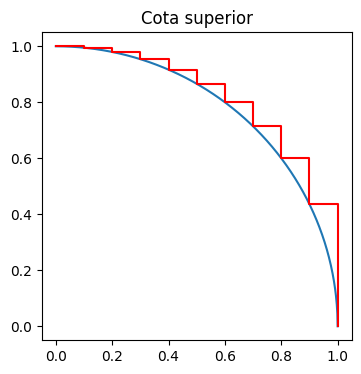

In [7]:
# Cota superior
N = 10
xsup = []
ysup = []
plt.figure(figsize=(4,4))
plt.plot(x, [funcion(i) for i in x])

for i in range(N):
    xsup.append(i/N)
    ysup.append(funcion(xsup[-1]))
    ysup.append(funcion(xsup[-1]))
    xsup.append((i+1)/N)
xsup.append(1)
ysup.append(0)
plt.plot(xsup, ysup, color="red")
plt.title("Cota superior")
plt.show()

In [8]:
superior = 0
for i in range(N):
    superior += funcion(i/N)/N
    
print(inferior, teorico, superior)
# discutir trapecio... mejor o peor

0.7261295815620794 0.7853981633974483 0.8261295815620795


El trapecio en este caso también es cota inferior. Pensar que metodo será mejor, quiero que calculemos ademas del error cuanto demora en converger a la solución.

Ver https://es.wikipedia.org/wiki/Regla_del_trapecio

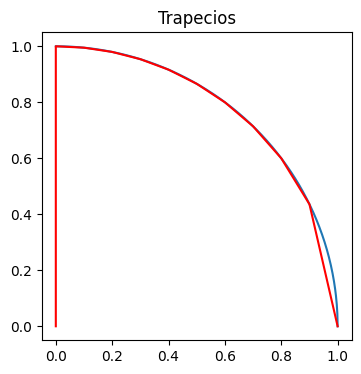

In [9]:
# Trapecio
N = 10
xtra = [0]
ytra = [0]
plt.figure(figsize=(4,4))
plt.plot(x, [funcion(i) for i in x])

for i in range(N):
    xtra.append(i/N)
    ytra.append(funcion(xtra[-1]))
    xtra.append((i+1)/N)
    ytra.append(funcion(xtra[-1]))
plt.plot(xtra, ytra, color="red")
plt.title("Trapecios")
plt.show()

In [10]:
#Spoiler... mañana scipy.integrate.quad

In [20]:
trapecios = 0
for i in range(N):
    trapecios += ((funcion(i/N)+funcion((i+1)/N))/2)/N

print(inferior, trapecios, teorico, superior)
abs = teorico-trapecios
print(abs, abs/teorico, 100*abs/teorico)
prom = (superior+inferior)/2
print(prom, trapecios, teorico)
# discutir trapecio... mejor o peor 

0.7261295815620794 0.7761295815620795 0.7853981633974483 0.8261295815620795
0.009268581835368828 0.011801124916405606 1.1801124916405605
0.7761295815620795 0.7761295815620795 0.7853981633974483
